# LV 1.

연속된 부분 수열의 합

https://school.programmers.co.kr/learn/courses/30/lessons/178870

**문제 설명**

    비내림차순으로 정렬된 수열이 주어질 때, 다음 조건을 만족하는 부분 수열을 찾으려고 합니다.
    기존 수열에서 임의의 두 인덱스의 원소와 그 사이의 원소를 모두 포함하는 부분 수열이어야 합니다.
    부분 수열의 합은 k입니다.
    합이 k인 부분 수열이 여러 개인 경우 길이가 짧은 수열을 찾습니다.
    길이가 짧은 수열이 여러 개인 경우 앞쪽(시작 인덱스가 작은)에 나오는 수열을 찾습니다.
    수열을 나타내는 정수 배열 sequence와 부분 수열의 합을 나타내는 정수 k가 매개변수로 주어질 때, 위 조건을 만족하는 부분 수열의 시작 인덱스와 마지막 인덱스를 배열에 담아 return 하는 solution 함수를 완성해주세요. 이때 수열의 인덱스는 0부터 시작합니다.

**제한사항**

    5 ≤ sequence의 길이 ≤ 1,000,000
    1 ≤ sequence의 원소 ≤ 1,000
    sequence는 비내림차순으로 정렬되어 있습니다.
    5 ≤ k ≤ 1,000,000,000
    k는 항상 sequence의 부분 수열로 만들 수 있는 값입니다.

**입출력 예**

![](https://velog.velcdn.com/images/heyggun/post/001eb2ba-75ac-4b3f-86ab-29fe2c215c66/image.png)



**입출력 예에 대한 설명**

    입출력 예 #1
    [1, 2, 3, 4, 5]에서 합이 7인 연속된 부분 수열은 [3, 4]뿐이므로 해당 수열의 시작 인덱스인 2와 마지막 인덱스 3을 배열에 담아 [2, 3]을 반환합니다.

    입출력 예 #2
    [1, 1, 1, 2, 3, 4, 5]에서 합이 5인 연속된 부분 수열은 [1, 1, 1, 2], [2, 3], [5]가 있습니다. 이 중 [5]의 길이가 제일 짧으므로 해당 수열의 시작 인덱스와 마지막 인덱스를 담은 [6, 6]을 반환합니다.

    입출력 예 #3
    [2, 2, 2, 2, 2]에서 합이 6인 연속된 부분 수열은 [2, 2, 2]로 3가지 경우가 있는데, 길이가 짧은 수열이 여러 개인 경우 앞쪽에 나온 수열을 찾으므로 [0, 2]를 반환합니다.


In [66]:
def solution(sequence, k):
    answer = []
    n = len(sequence)
    limit_sum, end = 0,0
    
    for i in range(len(sequence)):
        while limit_sum < k and end < n:
            limit_sum += sequence[end]
            end +=1
            
        if limit_sum == k:
            answer.append([i, end-1, end-1-i])
        
        limit_sum-= sequence[i]
        
    answer = sorted(answer, key=lambda x: x[2])
    
    return answer[0][:2]



In [67]:
print(solution([1, 2, 3, 4, 5], 7))
print(solution([1, 1, 1, 2, 3, 4, 5], 5))
print(solution([2, 2, 2, 2, 2], 6))

[2, 3]
[6, 6]
[0, 2]


In [95]:
def solution(sequence, k):
    answer = []
    origin_lst = sequence.copy()

    sequence = sorted(sequence, reverse=True)
    queue = deque(sequence)
    
    start,end,num = 0,0,0
    while queue:
        q = queue.popleft()
        start=q
        num +=q
        
        if q==k:
            start, end = q,q
            break

        if num+queue[0] ==k:
            end, start = q, queue.popleft()
            break

        if num+queue[0]>k:
            start =0
            
    for idx, seq in enumerate(origin_lst):
        if seq==start:
            answer.append(idx)
            start_idx= idx
            for j, seq2 in enumerate(origin_lst[idx:]):
                if seq2==end:
                    answer.append(idx)
                    break

    return answer

In [96]:
print(solution([1, 2, 3, 4, 5], 7))
print(solution([1, 1, 1, 2, 3, 4, 5], 5))
print(solution([2, 2, 2, 2, 2], 6))

[6, 6]
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]


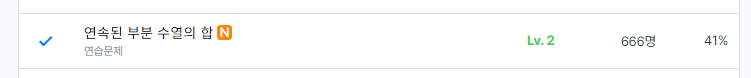

**다른 사람 풀이**


    - 내가 생각했던 로직... 중간에 구현에 실패했지만
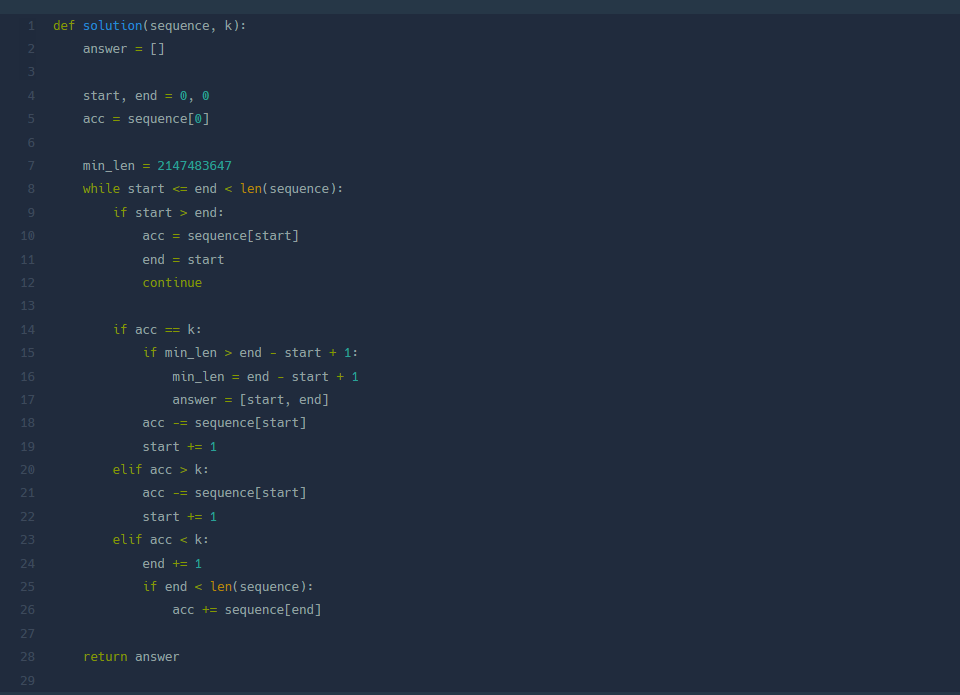

    - 누적합을 이용한 풀이
    
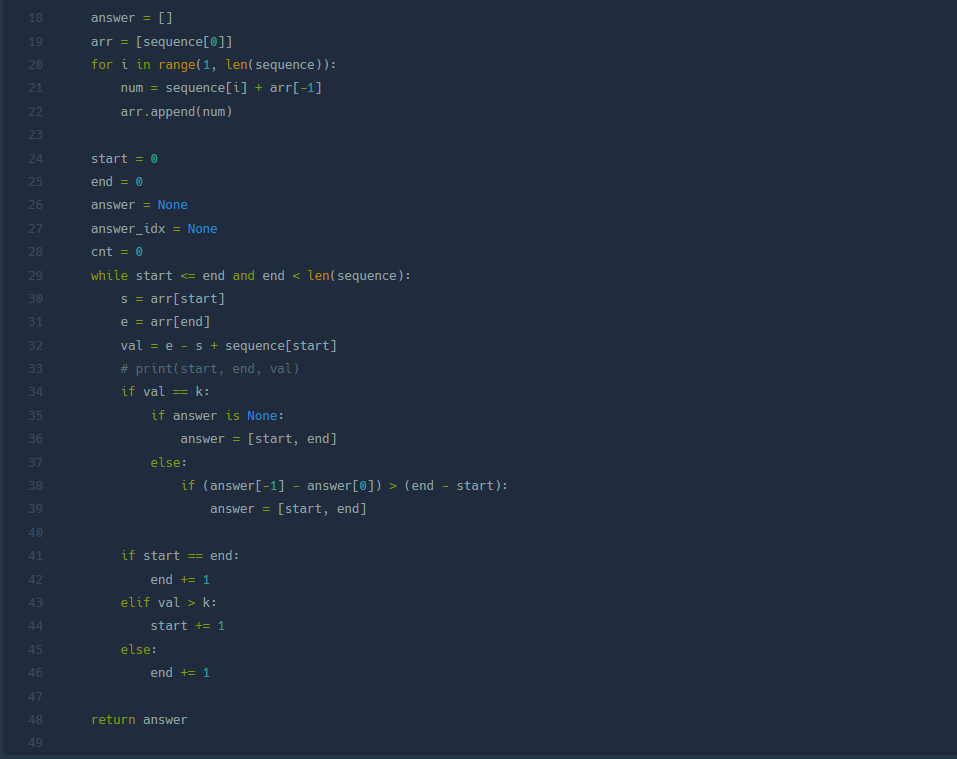 

In [77]:
from collections import deque

sequence, k = [1, 1, 1, 2, 3, 4, 5], 5
answer = []
origin_lst = sequence.copy()

sequence = sorted(sequence, reverse=True)
queue = deque(sequence)

print(origin_lst)

start,end,num = 0,0,0

while queue:
    print(f"queue -> {queue}")
    q = queue.popleft()
    start=q
    num +=q
    print(f"start ->{start}")
    
    if q==k:
        start, end = q,q
        break
    
    if num+queue[0] ==k:
        end, start = q, queue.popleft()
        print(f" start, end -> {start, end}")
        break
    
    if num+queue[0]>k:
        start =0
        

start,end

for idx, seq in enumerate(origin_lst):
    if seq==start:
        answer.append(idx)
        start_idx= idx
        
        for j, seq2 in enumerate(origin_lst[idx:]):
            if seq2==end:
                answer.append(idx)
                
answer

[1, 1, 1, 2, 3, 4, 5]
queue -> deque([5, 4, 3, 2, 1, 1, 1])
start ->5


[6, 6]

In [62]:
sequence,k = [1, 1, 1, 2, 3, 4, 5],5

max_sum, end = 0,0
answer = []
n = len(sequence)

for i in range(n):
    while max_sum < k and end < n:
        max_sum += sequence[end]
        end +=1
        
    if max_sum == k:
        answer.append([i, end-1, end-1-i])
        
    max_sum -= sequence[i]
    
print(answer)
answer = sorted(answer, key=lambda x: x[2])
print(f" sort -> {answer}")
answer[0][:2]
        
    

[[0, 3, 3], [3, 4, 1], [6, 6, 0]]
 sort -> [[6, 6, 0], [3, 4, 1], [0, 3, 3]]


[6, 6]